In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [4]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [5]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
fildf_x = fildf.loc[:,xfeatures]

In [8]:
fildf_y = fildf.loc[:,yfeatures]

In [9]:
def convertmarks(mark):
    if mark<10:
        return 'F'
    elif mark==10 or mark==11:
        return 'D'
    elif mark==12 or mark==13:
        return 'C'
    elif mark==14 or mark==15:
        return'B'
    else:
        return 'A'

In [10]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [11]:
fildf_x['New G1']

0      F
1      F
2      B
3      D
4      D
      ..
877    F
878    C
879    D
880    C
881    F
Name: New G1, Length: 882, dtype: object

In [12]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [13]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [14]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [17]:
fildf_x['New G1']

0      4
1      4
2      1
3      3
4      3
      ..
877    4
878    2
879    3
880    2
881    4
Name: New G1, Length: 882, dtype: int64

In [18]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [19]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [20]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [21]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_y['New G3']
target_y_G1 = fildf_y['New G1']

In [22]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [23]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [24]:
clf = GaussianNB()

In [25]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.90      0.07      0.13       126
           1       0.00      0.00      0.00         0
           2       0.19      0.61      0.29        33
           3       0.31      0.58      0.40        19
           4       0.52      0.70      0.59        43

    accuracy                           0.32       221
   macro avg       0.38      0.39      0.28       221
weighted avg       0.67      0.32      0.27       221

Kappa Score: 0.1861525704809287


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.08      0.04      0.05        27
           1       0.80      0.12      0.21       102
           2       0.19      0.61      0.29        31
           3       0.10      0.33      0.15         6
           4       0.61      0.78      0.68        55

    accuracy                           0.35       221
   macro avg       0.35      0.38      0.27       221
weighted avg       0.56      0.35      0.31       221

Kappa Score: 0.20028144946474324


In [27]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.70      0.05      0.09       150
           1       0.10      0.12      0.11        24
           2       0.04      0.44      0.07         9
           3       0.24      0.68      0.35        19
           4       0.62      0.42      0.50        19

    accuracy                           0.16       221
   macro avg       0.34      0.34      0.22       221
weighted avg       0.56      0.16      0.15       221

Kappa Score: 0.07235060480231092


In [28]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.29      0.11      0.16        47
           1       0.75      0.30      0.43       120
           2       0.14      0.57      0.22        23
           3       0.25      0.68      0.37        19
           4       0.70      0.58      0.64        12

    accuracy                           0.33       221
   macro avg       0.43      0.45      0.36       221
weighted avg       0.54      0.33      0.36       221

Kappa Score: 0.16717083675143563


### Decision Tree Classfier

In [29]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.30      0.25      0.27        12
           1       0.14      0.13      0.14        15
           2       0.70      0.69      0.69       105
           3       0.33      0.31      0.32        39
           4       0.52      0.60      0.56        50

    accuracy                           0.54       221
   macro avg       0.40      0.40      0.40       221
weighted avg       0.53      0.54      0.54       221

Kappa Score: 0.3249281264973647
	
Feature failures.x and its importance is 0.17053300445903585
Feature schoolsup.x and its importance is 0.1106624185026394
Feature age and its importance is 0.055682718347419266
Feature freetime.x and its importance is 0.05160557344145224
Feature absences.x and its importance is 0.051052082953817274
Feature Fedu and its importance is 0.046074675572390526
Feature Fjob and its importance is 0.04407650752756983
Feature health.x and its importance is 0.039168951783089795
Featur

([<matplotlib.axis.XTick at 0x7fbfe6b69cd0>,
 <a list of 30 Text xticklabel objects>)

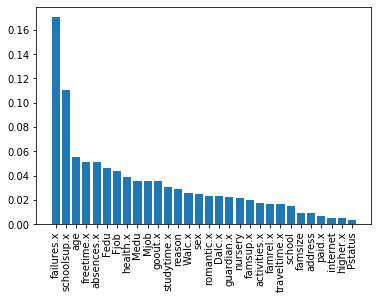

In [30]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.07      0.07      0.07        15
           2       0.65      0.60      0.62       110
           3       0.24      0.18      0.20        28
           4       0.52      0.70      0.60        53

    accuracy                           0.51       221
   macro avg       0.36      0.36      0.36       221
weighted avg       0.50      0.51      0.50       221

Kappa Score: 0.2737562756732086
	
Feature failures.x and its importance is 0.1473574000206285
Feature schoolsup.x and its importance is 0.1144845708009303
Feature absences.x and its importance is 0.06431754925253583
Feature Medu and its importance is 0.056179451454736844
Feature age and its importance is 0.046944795971897955
Feature Fjob and its importance is 0.04609583971159165
Feature Dalc.x and its importance is 0.04550924857791388
Feature health.x and its importance is 0.04499837815253197
Feature freet

([<matplotlib.axis.XTick at 0x7fbfe6c6bcd0>,
 <a list of 30 Text xticklabel objects>)

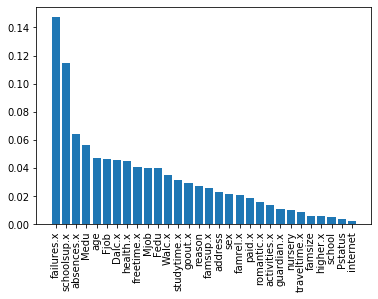

In [31]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.20      0.15      0.17        13
           1       0.20      0.17      0.18        36
           2       0.48      0.52      0.50       104
           3       0.31      0.35      0.33        49
           4       0.23      0.16      0.19        19

    accuracy                           0.37       221
   macro avg       0.28      0.27      0.27       221
weighted avg       0.36      0.37      0.36       221

Kappa Score: 0.06734068069344501
	
Feature absences.y and its importance is 0.08533795041198686
Feature health.y and its importance is 0.07232846273532469
Feature studytime.y and its importance is 0.054419746666260496
Feature Mjob and its importance is 0.0544070794792021
Feature Medu and its importance is 0.053827806776871
Feature Fedu and its importance is 0.05008961407592275
Feature freetime.y and its importance is 0.048766319440107446
Feature famrel.y and its importance is 0.048312462930346224
Feature g

([<matplotlib.axis.XTick at 0x7fbfe70419d0>,
 <a list of 30 Text xticklabel objects>)

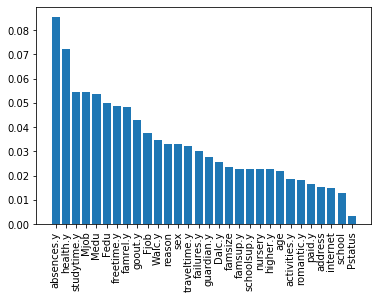

In [32]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.18      0.14      0.16        21
           1       0.33      0.35      0.34        46
           2       0.46      0.45      0.46        98
           3       0.27      0.30      0.29        47
           4       0.20      0.22      0.21         9

    accuracy                           0.36       221
   macro avg       0.29      0.29      0.29       221
weighted avg       0.36      0.36      0.36       221

Kappa Score: 0.08982279068418453
	
Feature Medu and its importance is 0.08324589363020862
Feature famrel.y and its importance is 0.06993354375453975
Feature Fedu and its importance is 0.06229757587326595
Feature studytime.y and its importance is 0.05715971433307668
Feature reason and its importance is 0.05427369339469472
Feature age and its importance is 0.05275275461686156
Feature absences.y and its importance is 0.05205958618347668
Feature freetime.y and its importance is 0.04808613523865344
Feature heal

([<matplotlib.axis.XTick at 0x7fbfe71eea10>,
 <a list of 30 Text xticklabel objects>)

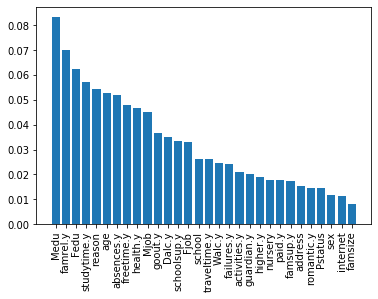

In [33]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest

In [34]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.10      1.00      0.18         1
           1       0.07      1.00      0.13         1
           2       0.99      0.61      0.76       166
           3       0.39      0.74      0.51        19
           4       0.57      0.97      0.72        34

    accuracy                           0.68       221
   macro avg       0.42      0.86      0.46       221
weighted avg       0.87      0.68      0.73       221

Kappa Score: 0.46770808244159234
	
Feature failures.x and its importance is 0.1373135433649004
Feature schoolsup.x and its importance is 0.07981576753973836
Feature absences.x and its importance is 0.0588046021526085
Feature Mjob and its importance is 0.04427319292835295
Feature Walc.x and its importance is 0.04267737516656373
Feature goout.x and its importance is 0.04222564746864776
Feature Fedu and its importance is 0.041259528540029435
Feature health.x and its importance is 0.041176743959713456
Feature 

([<matplotlib.axis.XTick at 0x7fbfe73a3b10>,
 <a list of 30 Text xticklabel objects>)

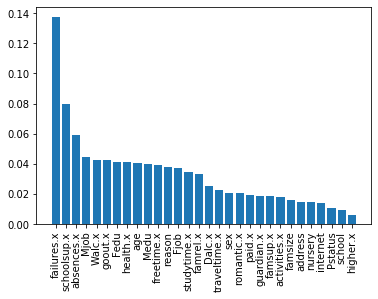

In [35]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.00      0.00      0.00         2
           2       0.98      0.61      0.75       163
           3       0.00      0.00      0.00         0
           4       0.68      0.89      0.77        54

    accuracy                           0.68       221
   macro avg       0.36      0.50      0.36       221
weighted avg       0.89      0.68      0.75       221

Kappa Score: 0.44607618173474073
	
Feature failures.x and its importance is 0.12198082060799752
Feature schoolsup.x and its importance is 0.07505521133543615
Feature absences.x and its importance is 0.06497236049293606
Feature Mjob and its importance is 0.04661082263912399
Feature age and its importance is 0.04516227753945204
Feature goout.x and its importance is 0.04441170360264663
Feature Medu and its importance is 0.042541955096120444
Feature Walc.x and its importance is 0.04236566405687972
Feature heal

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fbfe76c8550>,
 <a list of 30 Text xticklabel objects>)

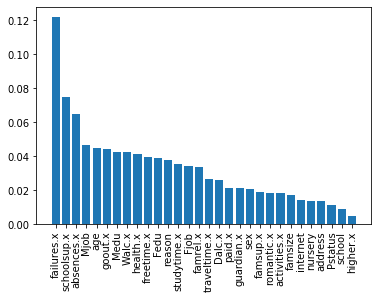

In [36]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.10      1.00      0.18         1
           1       0.07      0.50      0.12         4
           2       0.96      0.59      0.73       184
           3       0.36      0.65      0.47        31
           4       0.08      1.00      0.14         1

    accuracy                           0.60       221
   macro avg       0.31      0.75      0.33       221
weighted avg       0.85      0.60      0.67       221

Kappa Score: 0.2493034616999351
	
Feature absences.y and its importance is 0.06386707523065238
Feature health.y and its importance is 0.0521037313669768
Feature age and its importance is 0.05038237273322025
Feature Fedu and its importance is 0.048703518192923616
Feature goout.y and its importance is 0.04852200678234553
Feature Medu and its importance is 0.048366983063337775
Feature studytime.y and its importance is 0.04785194623616481
Feature freetime.y and its importance is 0.047385789619970635
Feature Mj

([<matplotlib.axis.XTick at 0x7fbfe787a590>,
 <a list of 30 Text xticklabel objects>)

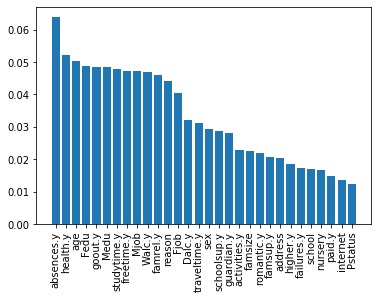

In [37]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.23      0.42      0.30        26
           2       0.87      0.48      0.62       173
           3       0.24      0.57      0.33        21
           4       0.10      1.00      0.18         1

    accuracy                           0.48       221
   macro avg       0.29      0.49      0.29       221
weighted avg       0.73      0.48      0.55       221

Kappa Score: 0.16234996841440308
	
Feature absences.y and its importance is 0.05897288010722783
Feature health.y and its importance is 0.05357600782691612
Feature Fedu and its importance is 0.05125855107354987
Feature goout.y and its importance is 0.05018581276226195
Feature Medu and its importance is 0.04969461291329824
Feature age and its importance is 0.049359647714978534
Feature Mjob and its importance is 0.04891573251746854
Feature freetime.y and its importance is 0.04757038315357601
Feature Walc.y an

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fbfe798d0d0>,
 <a list of 30 Text xticklabel objects>)

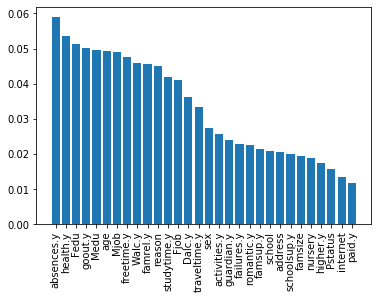

In [38]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [39]:
lsvm = LinearSVC(max_iter=1000000)

In [40]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.99      0.60      0.75       170
           3       0.31      0.69      0.42        16
           4       0.55      0.91      0.69        35

    accuracy                           0.66       221
   macro avg       0.37      0.44      0.37       221
weighted avg       0.87      0.66      0.71       221

Kappa Score: 0.41528285465622294


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.99      0.59      0.74       170
           3       0.00      0.00      0.00         0
           4       0.65      0.90      0.75        51

    accuracy                           0.67       221
   macro avg       0.33      0.30      0.30       221
weighted avg       0.91      0.67      0.75       221

Kappa Score: 0.4134146341463415


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      1.00      0.06         1
           2       0.91      0.61      0.73       169
           3       0.45      0.62      0.53        40
           4       0.54      0.64      0.58        11

    accuracy                           0.62       221
   macro avg       0.39      0.57      0.38       221
weighted avg       0.81      0.62      0.68       221

Kappa Score: 0.3136896715501808


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.48      0.48      0.48        48
           2       0.80      0.55      0.66       137
           3       0.41      0.66      0.51        32
           4       0.20      0.50      0.29         4

    accuracy                           0.55       221
   macro avg       0.38      0.44      0.39       221
weighted avg       0.66      0.55      0.59       221

Kappa Score: 0.3130612244897959


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [44]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [45]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.97      0.60      0.74       168
           3       0.19      0.54      0.29        13
           4       0.53      0.82      0.65        38

    accuracy                           0.62       221
   macro avg       0.34      0.39      0.33       221
weighted avg       0.84      0.62      0.69       221

Kappa Score: 0.3639074799736449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.99      0.60      0.75       169
           3       0.00      0.00      0.00         0
           4       0.65      0.90      0.75        51

    accuracy                           0.67       221
   macro avg       0.33      0.30      0.30       221
weighted avg       0.91      0.67      0.74       221

Kappa Score: 0.4152393892802231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.30      0.56      0.39        16
           2       0.87      0.63      0.73       155
           3       0.44      0.65      0.52        37
           4       0.62      0.62      0.62        13

    accuracy                           0.63       221
   macro avg       0.44      0.49      0.45       221
weighted avg       0.74      0.63      0.66       221

Kappa Score: 0.3672927868165631


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.46      0.48        52
           2       0.77      0.60      0.67       122
           3       0.51      0.70      0.59        37
           4       0.40      0.40      0.40        10

    accuracy                           0.57       221
   macro avg       0.44      0.43      0.43       221
weighted avg       0.65      0.57      0.60       221

Kappa Score: 0.3660278320312499


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [49]:
gb = GradientBoostingClassifier(random_state=0)

In [50]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.29      0.50      0.36         8
           2       0.91      0.63      0.74       150
           3       0.31      0.55      0.39        20
           4       0.57      0.82      0.67        40

    accuracy                           0.64       221
   macro avg       0.41      0.50      0.43       221
weighted avg       0.76      0.64      0.67       221

Kappa Score: 0.422059651097355


In [51]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.00      0.00      0.00         7
           2       0.92      0.59      0.72       158
           3       0.14      0.60      0.23         5
           4       0.59      0.89      0.71        47

    accuracy                           0.64       221
   macro avg       0.36      0.52      0.38       221
weighted avg       0.79      0.64      0.68       221

Kappa Score: 0.393065568142808


In [52]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.10      0.33      0.15         3
           1       0.30      0.45      0.36        20
           2       0.84      0.62      0.71       154
           3       0.38      0.60      0.47        35
           4       0.23      0.33      0.27         9

    accuracy                           0.58       221
   macro avg       0.37      0.47      0.39       221
weighted avg       0.68      0.58      0.62       221

Kappa Score: 0.2932179233149095


In [53]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.12      0.22      0.15         9
           1       0.38      0.44      0.40        41
           2       0.77      0.52      0.62       140
           3       0.31      0.73      0.44        22
           4       0.40      0.44      0.42         9

    accuracy                           0.51       221
   macro avg       0.39      0.47      0.41       221
weighted avg       0.61      0.51      0.54       221

Kappa Score: 0.25894187779433675
